# Определение перспективного тарифа для компании «Мегалайн»
Компания «Мегалайн» — федеральный оператор сотовой связи, которая предлагает своим клиентам два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, нам необходимо понять, какой тариф приносит больше денег.
Для этого необходимо  на небольшой выборке клиентов (предоставлены данные 500 пользователей «Мегалайна») провести предварительный анализ тарифов, проанализировать поведение клиентов и сделать вывод.

## Оглавление
[1. Открытие файлов с данными и изучение общей информации](#section_1)<br>
[2. Предобработка данных](#section_2)<br>
[3. Анализ данных](#section_3)<br>
[4. Проверка гипотез](#section_4)<br>
[5. Общий вывод](#section_5)<br>


<a id='section_1'><h3>1. Открытие файлов с данными и изучение общей информации</h3></a>


##### Подгрузка необходимых библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import warnings

warnings.filterwarnings('ignore')

##### Чтение необходимых файлов и изучение информации

In [2]:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv') 
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

In [3]:
calls.info()
calls.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [4]:
internet.info()
internet.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [5]:
messages.info()
messages.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [6]:
tariffs.info()
tariffs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [7]:
users.info()
users.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


##### Вывод
В таблицах необходимо: 
<ol>
    <li>Поменять тип данных (object на data)</li>
    <li>Необходимо удалить лишний столбец в таблице <em>internet</em></li>
    <li>Заменить NaN в таблице <em>users</em> на самое позднее время выгрузки данных (так как тариф используется)</li>
    <li>Округлить в большую сторону количетсво мегабайт и длительность звонка, сменить типы данных</li>
    
</ol>

<a id='section_2'><h3>2. Предобработка данных</h3></a>

##### 2.1. Изменение типов данных в таблицах

In [8]:
#Меняем тип столбца call_date на date (таблица calls)
calls['call_date'] = pd.to_datetime(calls['call_date'])
#Меняем тип столбца session_date на date (таблица internet)
internet['session_date'] = pd.to_datetime(internet['session_date'])
#Меняем тип столбца message_date на date (таблица messages)
messages['message_date'] = pd.to_datetime(messages['message_date'])
#Меняем тип столбца message_date на date (таблица messages)
users['churn_date'] = pd.to_datetime(users['churn_date'])
users['reg_date'] = pd.to_datetime(users['reg_date'])

In [9]:
# Проверяем изменение типов данных
print(calls.dtypes)
print()
print(internet.dtypes)
print()
print(messages.dtypes)
print()
print(users.dtypes)

id                   object
call_date    datetime64[ns]
duration            float64
user_id               int64
dtype: object

Unnamed: 0               int64
id                      object
mb_used                float64
session_date    datetime64[ns]
user_id                  int64
dtype: object

id                      object
message_date    datetime64[ns]
user_id                  int64
dtype: object

user_id                int64
age                    int64
churn_date    datetime64[ns]
city                  object
first_name            object
last_name             object
reg_date      datetime64[ns]
tariff                object
dtype: object


##### 2.2. Удаление лишнего столбца в таблице Internet

In [10]:
internet = internet.drop(columns=['Unnamed: 0'])

##### 2.3. Замена NaN в таблице users на время выгрузки данных

In [11]:
#Определим время выгрузки данных по последней дате звонков, сообщений и интернет сессий
print(internet['session_date'].max())
print(calls['call_date'].max())
print(messages['message_date'].max())

2018-12-31 00:00:00
2018-12-31 00:00:00
2018-12-31 00:00:00


In [12]:
#Заменяем значения NaN на дату 2018-12-31
users['churn_date'] = users['churn_date'].fillna(value = messages['message_date'].max())

In [13]:
users.info()
users.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    500 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,2018-12-31,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,2018-12-31,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,2018-12-31,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,2018-12-31,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,2018-12-31,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,2018-12-31,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,2018-12-31,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,2018-12-31,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,2018-12-31,Пермь,Василиса,Блинова,2018-03-22,smart


##### 2.4. Округление и изменение типов данных количества мегабайт и длительности звонков

In [14]:
#Округляем до верхнего значения
internet['mb_used'] = internet['mb_used'].apply(np.ceil)
calls['duration'] = calls['duration'].apply(np.ceil)

In [15]:
#Поменияем тип данных на int, так как в этих столбцах теперь храняться только целочисленные значния
internet['mb_used'] = internet['mb_used'].astype('int')
calls['duration'] = calls['duration'].astype('int')

In [16]:
print(calls.dtypes)
print()
print(internet.dtypes)


id                   object
call_date    datetime64[ns]
duration              int64
user_id               int64
dtype: object

id                      object
mb_used                  int64
session_date    datetime64[ns]
user_id                  int64
dtype: object


##### 2.5. Исправление количества доступных гигабайт в таблице tariffs

В информации о тарифе написано, что количество доступных гигабайт для тарифа "Смарт" - 15Гб, а для тарифа "Ультра" - 30Гб

In [17]:
#Заменим неправильные данные количества доступных Гб
tariffs.loc[tariffs['mb_per_month_included'] == 15360, 'mb_per_month_included'] = 15360
tariffs.loc[tariffs['mb_per_month_included'] == 30720, 'mb_per_month_included'] = 30720

In [19]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


##### 2.6. Количество сделанных звонков и израсходованных минут разговора по месяцам

In [20]:
#Создадим в трёх таблицах дополнительный столбец month
calls['month'] = calls['call_date'].dt.month
messages['month'] = messages['message_date'].dt.month
internet['month'] = internet['session_date'].dt.month

In [21]:
calls.head(10)

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12
5,1000_5,2018-11-02,0,1000,11
6,1000_6,2018-10-18,0,1000,10
7,1000_7,2018-08-22,19,1000,8
8,1000_8,2018-09-15,19,1000,9
9,1000_9,2018-08-15,0,1000,8


In [22]:
users_copy = users.copy()
users_copy = users.drop(columns=['age', 'churn_date', 'city', 'first_name', 'last_name', 'reg_date'])

In [23]:
calls = calls.merge(users_copy, on=['user_id'])
messages = messages.merge(users_copy, on=['user_id'])
internet = internet.merge(users_copy, on=['user_id'])


In [24]:
#Составим сводную таблицу количества и длительности звонков
pivot_calls = calls.pivot_table(index=['user_id', 'month', 'tariff'], values=['id', 'duration', 'tariff'],
                                aggfunc= {'id': 'count','duration': 'sum'}, fill_value=0)
pivot_calls.set_axis(['calls_dur','calls_total'], axis='columns',inplace=True) 
pivot_calls.head(10)

calls_dur  calls_total
user_id month tariff                        
1000    5     ultra         159           22
        6     ultra         172           43
        7     ultra         340           47
        8     ultra         408           52
        9     ultra         466           58
        10    ultra         350           57
        11    ultra         338           43
        12    ultra         333           46
1001    11    smart         430           59
        12    smart         414           63

##### 2.7. Количество отправленных сообщений по месяцам

In [25]:
#Составим сводную таблицу количества сообщений
pivot_messages = messages.pivot_table(index=['user_id', 'month', 'tariff'], values=['id'],aggfunc='count', fill_value=0)
pivot_messages.set_axis(['messages'], axis='columns',inplace=True) 
pivot_messages.head(10)

messages
user_id month tariff          
1000    5     ultra         22
        6     ultra         60
        7     ultra         75
        8     ultra         81
        9     ultra         57
        10    ultra         73
        11    ultra         58
        12    ultra         70
1002    6     smart          4
        7     smart         11

##### 2.8. Объем израсходованного интернет-трафика по месяцам

In [26]:
#Составим сводную таблицу количества использованного трафика
pivot_internet = internet.pivot_table(index=['user_id', 'month', 'tariff'], values=['mb_used'],aggfunc='sum', fill_value=0)
pivot_internet.head(10)

mb_used
user_id month tariff         
1000    5     ultra      2256
        6     ultra     23257
        7     ultra     14016
        8     ultra     14070
        9     ultra     14581
        10    ultra     14717
        11    ultra     14768
        12    ultra      9827
1001    11    smart     18452
        12    smart     14053

In [27]:
#Составим сводную всех прошлых сводных таблиц и заменим пропущенные значения нулями. 
subtotal = pivot_calls.merge(pivot_messages, on=['user_id', 'month', 'tariff'], how='outer')
total = subtotal.merge(pivot_internet, on=['user_id', 'month', 'tariff'], how='outer')
total['messages'] = total['messages'].fillna(value = 0)
total['calls_total'] = total['calls_total'].fillna(value = 0)
total['calls_dur'] = total['calls_dur'].fillna(value = 0)
total['mb_used'] = total['mb_used'].fillna(value = 0)
total.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (1000, 5, ultra) to (1476, 4, ultra)
Data columns (total 4 columns):
calls_dur      3214 non-null float64
calls_total    3214 non-null float64
messages       3214 non-null float64
mb_used        3214 non-null float64
dtypes: float64(4)
memory usage: 117.2+ KB


##### 2.9. Подсчёт помесячной выручки с каждого пользователя

In [28]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [29]:
#Создадим переменные из таблицы tariffs
messages_ultra = 1000
messages_smart = 50
mb_smart = 15000
mb_ultra = 30000
calls_smart = 500
calls_ultra = 3000
fee_smart = 550
fee_ultra = 1950 
gb_smart = 200
gb_ultra = 150
rub_message_smart = 3
rub_message_ultra = 1
rub_minute_smart = 3
rub_minute_ultra = 1

In [30]:
#выберем пользователей тарифа ultra
total_ultra = total.query('tariff == "ultra"')


In [31]:
#посчитаем сколько тратят пользователи на звонки смс и интернет
#Я вычитаю из количества звонков, смс и интернета доступные по тарифу значения
#Ессли пользователь не истратил лимит, то полученные значения будут отрицательные и следовательно входить в абонен. плату
#Если положительные, то я умножаю на число заявленное по тарифу
#Для ультра звонки и смс по 1 рублю, то есть равны количествам минут и смс
total_ultra['calls_cost'] = total_ultra['calls_dur'] - calls_ultra
total_ultra.loc[total_ultra['calls_cost'] < 0, 'calls_cost'] = 0
total_ultra['message_cost'] = total_ultra['messages'] - messages_ultra
total_ultra.loc[total_ultra['message_cost'] < 0, 'message_cost'] = 0
total_ultra['mb_cost'] = total_ultra['mb_used'] - mb_ultra
total_ultra.loc[total_ultra['mb_cost'] < 0, 'mb_cost'] = 0
#Для подсчёта кол-ва Гб я делю без остатка кол-во Мб и прибавляю 1, так как даже 1Мб идёт в счёт покупки Гб
total_ultra.loc[total_ultra['mb_cost'] > 0, 'mb_cost'] = ((total_ultra['mb_cost'] // 1024) + 1) * gb_ultra


In [32]:
total_ultra['total_cost'] = total_ultra['calls_cost'] + total_ultra['message_cost'] + total_ultra['mb_cost'] + fee_ultra
total_ultra.head()

calls_dur  calls_total  messages  mb_used  calls_cost  \
user_id month tariff                                                          
1000    5     ultra       159.0         22.0      22.0   2256.0         0.0   
        6     ultra       172.0         43.0      60.0  23257.0         0.0   
        7     ultra       340.0         47.0      75.0  14016.0         0.0   
        8     ultra       408.0         52.0      81.0  14070.0         0.0   
        9     ultra       466.0         58.0      57.0  14581.0         0.0   

                      message_cost  mb_cost  total_cost  
user_id month tariff                                     
1000    5     ultra            0.0      0.0      1950.0  
        6     ultra            0.0      0.0      1950.0  
        7     ultra            0.0      0.0      1950.0  
        8     ultra            0.0      0.0      1950.0  
        9     ultra            0.0      0.0      1950.0

In [33]:
total_ultra['total_cost'].median()

1950.0

Мы видим, что в среднем пользователи тарифа "ultra" платят только абонентскую плату.

In [34]:
#Сделаем то же самое для тарфиа смарт
total_smart = total.query('tariff == "smart"')

In [35]:
total_smart['calls_cost'] = total_smart['calls_dur'] - calls_smart
total_smart.loc[total_smart['calls_cost'] < 0, 'calls_cost'] = 0
total_smart.loc[total_smart['calls_cost'] > 0, 'calls_cost'] = total_smart['calls_cost'] * rub_minute_smart
total_smart['message_cost'] = total_smart['messages'] - messages_smart
total_smart.loc[total_smart['message_cost'] < 0, 'message_cost'] = 0
total_smart.loc[total_smart['message_cost'] > 0, 'message_cost'] = total_smart['message_cost'] * rub_message_smart
total_smart['mb_cost'] = total_smart['mb_used'] - mb_smart
total_smart.loc[total_smart['mb_cost'] < 0, 'mb_cost'] = 0
total_smart.loc[total_smart['mb_cost'] > 0, 'mb_cost'] = ((total_smart['mb_cost'] // 1000) + 1) * gb_smart

In [36]:
total_smart['total_cost'] = total_smart['calls_cost'] + total_smart['message_cost'] + total_smart['mb_cost'] + fee_smart
total_smart.head(10)

calls_dur  calls_total  messages  mb_used  calls_cost  \
user_id month tariff                                                          
1001    11    smart       430.0         59.0       0.0  18452.0         0.0   
        12    smart       414.0         63.0       0.0  14053.0         0.0   
1002    6     smart       117.0         15.0       4.0  10871.0         0.0   
        7     smart       214.0         26.0      11.0  17601.0         0.0   
        8     smart       289.0         42.0      13.0  20347.0         0.0   
        9     smart       206.0         36.0       4.0  16712.0         0.0   
        10    smart       212.0         33.0      10.0  13905.0         0.0   
        11    smart       243.0         32.0      16.0  18610.0         0.0   
        12    smart       236.0         33.0      12.0  18137.0         0.0   
1005    1     smart        95.0         15.0       7.0   2730.0         0.0   

                      message_cost  mb_cost  total_cost  
user_id month tariff                                     
1001    11    smart            0.0    800.0      1350.0  
        12    smart            0.0      0.0       550.0  
1002    6     smart            0.0      0.0       550.0  
        7     smart            0.0    600.0      1150.0  
        8     smart            0.0   1200.0      1750.0  
        9     smart            0.0    400.0       950.0  
        10    smart            0.0      0.0       550.0  
        11    smart            0.0    800.0      1350.0  
        12    smart            0.0    800.0      1350.0  
1005    1     smart            0.0      0.0       550.0

In [37]:
total_smart['total_cost'].median()

1150.0

Мы видим, что в среднем пользователи тарифа "smart" платят в два раза больше абонентской платы, но всё же меньше чем для тарифа "ultra".

<a id='section_3'><h3>3. Анализ данных</h3></a>

##### Тариф Ultra. Нахождение среднего количества, дисперсии и стандартного отклонения. Построение гистограмм

In [38]:
#Создадим переменную со списком столбцов, для которых необходимо построить гистограммы
columns = ['calls_dur', 
           'messages', 
           'mb_used',
          ]    

In [39]:
def multiple_stat_ultra(columns):
    for row in columns:
        print(total_ultra[row].mean(), 'среднее столбца', row)
        print(total_ultra[row].std(), 'стандартное отклонение столбца', row)
        print(total_ultra[row].var(), 'дисперсия столбца', row)
        print()
    return

In [40]:
multiple_stat_ultra(columns)

526.6233502538071 среднее столбца calls_dur
317.6060978591264 стандартное отклонение столбца calls_dur
100873.63339730098 дисперсия столбца calls_dur

49.36345177664975 среднее столбца messages
47.804457350174715 стандартное отклонение столбца messages
2285.2661425446736 дисперсия столбца messages

19486.90152284264 среднее столбца mb_used
10096.317202238608 стандартное отклонение столбца mb_used
101935621.04821923 дисперсия столбца mb_used



Для тарифа "ultra" 
<ol>
    <li>среднее количество минут равно 468</li>
    <li> среднее количество сообщений равно: 49</li>
    <li>среднее количество трафика равно: 19,5ГБ</li>
</ol>
Учитывая, что для данного тарифа количество сообщений - 1000, минут - 3000, трафика-3000Мб, то можно сделать вывод, что большинство пользователей данного тарфиа не используют все доступные для них условия тарифа. 	

In [41]:
#Напишем функцию для автоматического построения гистограмм для всех столбцов
def multiple_hist_ultra(columns, bins):
    for row in columns:
        total_ultra.hist(column=row, range=(1, total_ultra[row].max()), bins=bins, figsize=(10,6))
        plt.ylabel('Частота')
    return

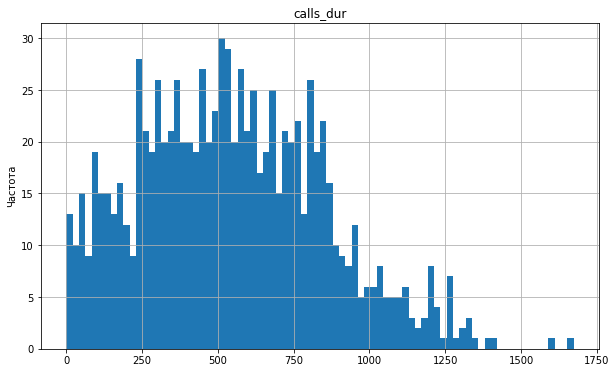

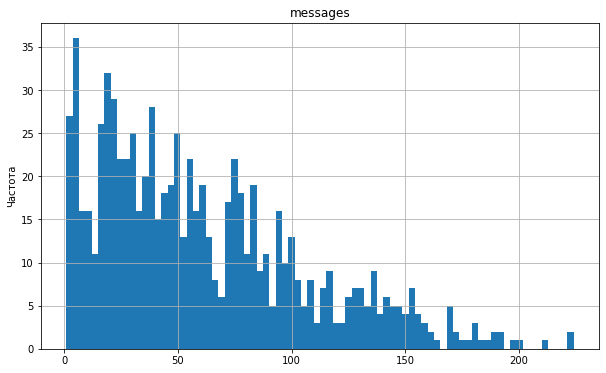

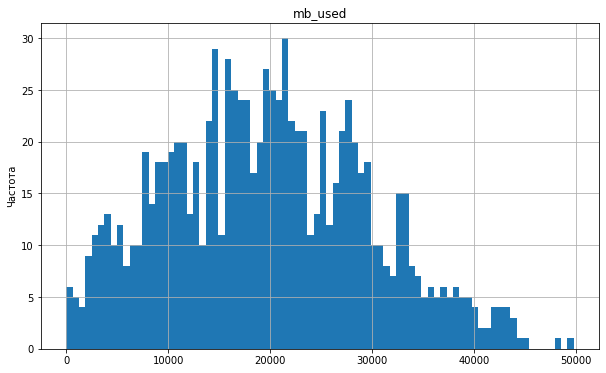

In [42]:
#Построение гистограмм для звонков, смс и трафика тарфиа ultra
multiple_hist_ultra(columns, 80)

На гистограммах видно, что нормальное распределение имеют графики минут и трафика. А гистограмма количества сообщений скошена вправо.

##### Тариф Smart. Нахождение среднего количества, дисперсии и стандартного отклонения. Построение гистограмм

In [43]:
def multiple_stat_smart(columns):
    for row in columns:
        print(total_smart[row].mean(), 'среднее столбца', row)
        print(total_smart[row].std(), 'стандартное отклонение столбца', row)
        print(total_smart[row].var(), 'дисперсия столбца', row)
        print()
    return

In [44]:
multiple_stat_smart(columns)

417.9349484073576 среднее столбца calls_dur
190.31372988921288 стандартное отклонение столбца calls_dur
36219.31578434428 дисперсия столбца calls_dur

33.384028712427096 среднее столбца messages
28.22787555676141 стандартное отклонение столбца messages
796.8129584480083 дисперсия столбца messages

16229.188425302826 среднее столбца mb_used
5877.576977544193 стандартное отклонение столбца mb_used
34545911.12695753 дисперсия столбца mb_used



Для тарифа "smart" 
<ol>
    <li>среднее количество минут равно 371</li>
    <li> среднее количество сообщений равно: 33</li>
    <li>среднее количество трафика равно: 16ГБ</li>
</ol>
Учитывая, что для данного тарифа количество сообщений - 50, минут - 500, трафика-15 Гб, то можно сделать вывод, что большинство пользователей данного тарфиа используют все доступные для них количества минут и сообщений. Однако, часто выходят за границы доступного для них объема трафика. 
 	

In [45]:
def multiple_hist_smart(columns, bins):
    for row in columns:
        total_smart.hist(column=row, range=(1, total_smart[row].max()), bins=bins, figsize=(10,6))
        plt.ylabel('Частота')
    return

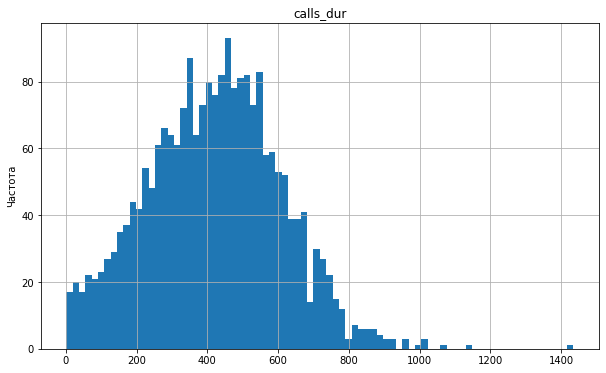

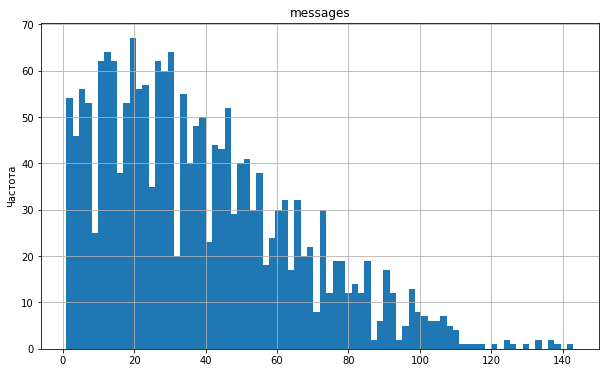

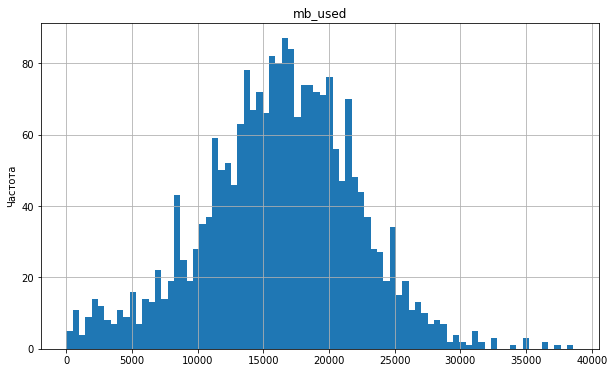

In [46]:
#Построение гистограмм для звонков, смс и трафика тарфиа smart
multiple_hist_smart(columns, 80)

Гистограммы длительности звонков и используемого интернет трафика имеют нормальное распределение. Гистограмма количества сообщений скошена вправо.

<a id='section_4'><h3>4. Проверка гипотез</h3></a>

##### 1. Проверка гипотезы о сходстве средней выручки пользователей тарифов «Ультра» и «Смарт»

Нулевая гипотеза будет звучать так: средняя выручка пользователей тарифов «Ультра» и «Смарт» не различается. 
Альтернативная гипотеза будет звучать так: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.
Уровень статистической значимости равен 0.01. Так как у нас достаточно большое количество данных

In [47]:
#Вычислим дисперсии для каждой выборки
print(total_ultra['total_cost'].var())
print(total_smart['total_cost'].var())

165529.8842391977
735307.8060562054


Полученные диспресии сильно отличаются друг от друга (примерно в 5 раз). Соответственно, equal_var = False

In [48]:
alpha = .01 
ultra_mean = total_ultra['total_cost']
smart_mean = total_smart['total_cost']
results = st.ttest_ind(
    ultra_mean, 
    smart_mean,
    equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 4.487319679962866e-206
Отвергаем нулевую гипотезу


Вывод: средняя выручка пользователей тарифов «Ультра» и «Смарт» <strong>различается</strong>

##### 2. Проверка гипотизы о сходстве средней выручка пользователей из Москвы и выручки пользователей из других регионов

In [49]:
#Соединим две таблицы со стоимостью в одну
concat = pd.concat([total_ultra, total_smart])

In [50]:
#Присоединим названия городов к пользователям
total_with_city = concat.merge(users[['city', 'user_id',  'tariff']], how = 'outer', on = ['user_id', 'tariff'])

In [51]:
#Выделим пользователей из москвы в одну таблицу, пользователей из других городов в другую таблицу
moscow = total_with_city.query('city == "Москва"')
other_cities = total_with_city.query('city != "Москва"')


Нулевая гипотеза будет звучать так: средняя выручка пользователей из Москвы не различается от выручки пользователей из других городов. Альтернативная гипотеза будет звучать так:средняя выручка пользователей из Москвы различается от выручки пользователей из других городов. Уровень статистической значимости равен 0.01.

In [52]:
moscow.isna().sum()

user_id         0
tariff          0
calls_dur       0
calls_total     0
messages        0
mb_used         0
calls_cost      0
message_cost    0
mb_cost         0
total_cost      0
city            0
dtype: int64

In [53]:
other_cities = other_cities.dropna()

In [54]:
other_cities.isna().sum()

user_id         0
tariff          0
calls_dur       0
calls_total     0
messages        0
mb_used         0
calls_cost      0
message_cost    0
mb_cost         0
total_cost      0
city            0
dtype: int64

In [55]:
#Вычислим дисперсии для каждой выборки
print(moscow['total_cost'].var())
print(other_cities['total_cost'].var())

601010.3142389525
693836.515736735


Полученные диспресии не отличаются друг от друга. Соответственно, equal_var = True

In [56]:
alpha = .01 

results = st.ttest_ind(
    moscow['total_cost'], 
    other_cities['total_cost'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.5917495713285646
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза подтвердилась: средняя выручка пользователей из Москвы <strong>не различается</strong> от выручки пользователей из других городов.

<a id='section_5'><h3>5. Общий вывод</h3></a>

Произведён предварительный анализ тарифов, проанализировано поведение клиентов. По результатам данного анализа можно сделать вывод, что наиболее прибыльным считается тариф ultra. Медианное значение прибыли для этого тарифа 1950 рублей, против 1000 рублей у тарифа smart. Этот вывод подтверждается альтернативной гипотезой о сходстве средней выручки пользователей тарифов «ultra» и «smart». Гипотеза о сходстве средней выручки пользователей из Москвы и выручки пользователей из других регионов подтвердилась. Следовательно нет никакой разницы между вырочкой от пользователей из Москвы и других городов. На мой взгляд, оценив затраты пользователей тарифа smart я бы посоветовал ввести третий тариф. Что то среднее между тарифами smart и ultra. Так пользователи тарифа smart не будут беспокоится о выходе за лимит по определённым параметрам и им будет проще контролировать свои расходы.